In [1]:
texasMapsLink="https://github.com/ThayraSosa/geodfprepro/raw/main/maps/texasMaps_3081(2).gpkg"

import geopandas as gpd
from  fiona import listlayers


#layers in maps
listlayers(texasMapsLink)

['airports', 'texas', 'capitals', 'rivers']

In [2]:
#EJERCICIO 1
texas_seaports=gpd.read_file(os.path.join("maps","hotosm_usa_texas_sea_ports_points_shp","hotosm_usa_texas_sea_ports_points.shp"))
texas_roads=gpd.read_file(os.path.join("maps","hotosm_usa_texas_roads_lines_shp","hotosm_usa_texas_roads_lines.shp"))
texas_airports=gpd.read_file(texasMapsLink,layer='airports')
texas_rivers=gpd.read_file(texasMapsLink,layer='rivers')
#Importamos los mapas

In [3]:
texas_seaports.crs, texas_roads.crs
#Los dos tienen un crs:4326, lo cambiaremos al recomendado que es 3081

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [4]:
texas_seaports_3081=texas_seaports.to_crs(3081)
texas_roads_3081=texas_roads.to_crs(3081)

In [5]:
largeAirports=texas_airports[texas_airports.kind=='large_airport'] 
largeAirports.reset_index(drop=True, inplace=True)
#Solo utilizaremos aquello aeropuertos grandes

<Axes: >

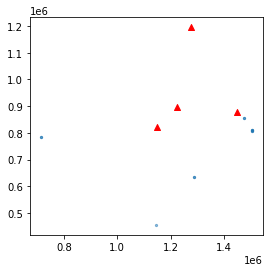

In [6]:
base=largeAirports.plot(color='red',marker="^")
texas_seaports_3081.plot(ax=base,alpha=0.5,markersize=5)
#Podemos observar los puertos maritimos y los aeropuertos grandes

In [7]:
texas_seaports_3081.head()
#algunos de los puertos dentro de Texas

,osm_id,amenity,name,addrcity,port,building,source,addrfull,operatorty,geometry
0,151807050.0,ferry_terminal,Lynchburg Ferry Landing South Entrance,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1474758.404 855155.893)
1,227494681.0,ferry_terminal,Port Aransas Ferry Landing,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1288546.601 635636.473)
2,227505779.0,ferry_terminal,Aransas Pass Ferry Landing,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1288407.395 636100.530)
3,499813347.0,ferry_terminal,Galveston Cruise Ship Terminal 1,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1504558.738 806283.645)
4,499816208.0,ferry_terminal,Galveston Cruise Terminal 2,NaN,NaN,NaN,NaN,NaN,NaN,POINT (1504206.959 806196.620)


In [8]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Dallas Fort Worth International Airport,large_airport,32.896801,-97.038002,607.0,Texas,Dallas-Fort Worth,POINT (1276629.054 1195172.574)
1,George Bush Intercontinental Houston Airport,large_airport,29.984400,-95.341400,97.0,Texas,Houston,POINT (1448569.399 878646.771)
2,Austin Bergstrom International Airport,large_airport,30.197535,-97.662015,542.0,Texas,Austin,POINT (1224672.448 895155.772)
3,San Antonio International Airport,large_airport,29.533701,-98.469803,809.0,Texas,San Antonio,POINT (1148068.908 820356.464)


In [9]:
#Hallamos la distancias entre cada seaport y airport
texas_seaports_3081.set_index('name').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
#Los nombres de los seaports definen las filas mientras que las columnas son los aeropuertos

name,Austin Bergstrom International Airport,Dallas Fort Worth International Airport,George Bush Intercontinental Houston Airport,San Antonio International Airport
name,,,,
Aransas Pass Ferry Landing,266.780363,559.196101,290.655374,231.614205
Bolivar Ferry Landing,293.214989,446.277725,87.700769,357.963395
Bolivar Ferry Landing,293.157636,446.220942,87.640865,357.913654
Bolivar Ferry Landing,293.188190,446.255829,87.676477,357.938367
Galveston Cruise Ship Terminal 1,293.657267,450.762176,91.494415,356.767491
Galveston Cruise Terminal 2,293.348383,450.659511,91.348576,356.419434
Lynchburg Ferry Landing North Entrance,253.367685,393.342162,35.090875,328.722998
Lynchburg Ferry Landing South Entrance,253.264636,393.530917,35.180752,328.537710
Port Aransas Ferry Landing,267.264240,559.663001,290.966150,232.067785


In [10]:
#Guardamos la matrix
distanceMatrixKM_sea_air=texas_seaports_3081.set_index('name').geometry.apply\
                        (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                        sort_index(axis=0).sort_index(axis=1)

In [11]:
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True)
#Hallamos la media de las distancias

name
Lynchburg Ferry Landing South Entrance 252.628504
Lynchburg Ferry Landing North Entrance 252.630930
Bolivar Ferry Landing 296.233275
Bolivar Ferry Landing 296.264716
Bolivar Ferry Landing 296.289219
Galveston Cruise Terminal 2 297.943976
Galveston Cruise Ship Terminal 1 298.170337
Aransas Pass Ferry Landing 337.061511
Port Aransas Ferry Landing 337.490294
NaN 521.414575
NaN 598.637998
NaN 598.686650
dtype: float64

In [12]:
#Hallamos los minimos de distancia para puertos y para aeropuertos
#Minima distancia que hay entre los puerto a un aeropuerto
distanceMatrixKM_sea_air.idxmin(axis="columns")

name
Aransas Pass Ferry Landing San Antonio International Airport
Bolivar Ferry Landing George Bush Intercontinental Houston Airport
Bolivar Ferry Landing George Bush Intercontinental Houston Airport
Bolivar Ferry Landing George Bush Intercontinental Houston Airport
Galveston Cruise Ship Terminal 1 George Bush Intercontinental Houston Airport
Galveston Cruise Terminal 2 George Bush Intercontinental Houston Airport
Lynchburg Ferry Landing North Entrance George Bush Intercontinental Houston Airport
Lynchburg Ferry Landing South Entrance George Bush Intercontinental Houston Airport
Port Aransas Ferry Landing San Antonio International Airport
NaN San Antonio International Airport
NaN San Antonio International Airport
NaN San Antonio International Airport
dtype: object

In [13]:
distanceMatrixKM_sea_air.idxmin(axis="rows")
#Minima distancia que hay entre aeropuertos a puertos

name
Austin Bergstrom International Airport Lynchburg Ferry Landing South Entrance
Dallas Fort Worth International Airport Lynchburg Ferry Landing North Entrance
George Bush Intercontinental Houston Airport Lynchburg Ferry Landing North Entrance
San Antonio International Airport Aransas Pass Ferry Landing
dtype: object

In [14]:
aransas_pass_ferry=distanceMatrixKM_sea_air[distanceMatrixKM_sea_air.index=="Aransas Pass Ferry Landing"]
aransas_pass_ferry_min=aransas_pass_ferry.idxmin(axis="columns")
aransas_pass_ferry_min
#Notamos que no hay valores numericos

name
Aransas Pass Ferry Landing San Antonio International Airport
dtype: object

<Axes: xlabel='name'>

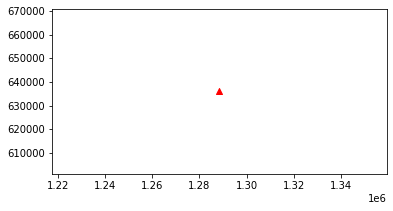

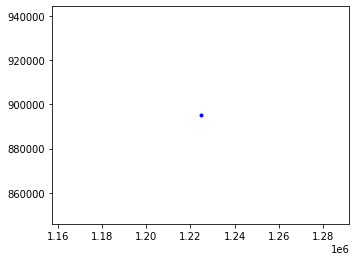

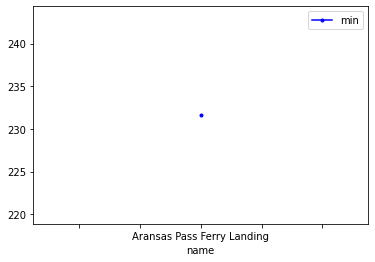

In [15]:
import pandas as pd
SomeStats=pd.DataFrame()
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats.head()
aransas_pass_ferry_min=SomeStats[SomeStats.index=="Aransas Pass Ferry Landing"]
base=texas_seaports_3081[texas_seaports_3081.name=="Aransas Pass Ferry Landing"].plot(color='red',marker="^")
min_2_airport=largeAirports[largeAirports.name=="Austin Bergstrom International Airport"]
min_2_airport.plot(color='blue',marker=".")
aransas_pass_ferry_min.plot(color='blue',marker=".")

In [16]:
#EJERCICIO 2
texas_rivers
#No quedamos con Rio Grande

,NAME,SYSTEM,geometry
0,Brazos,NaN,"LINESTRING (722233.533 1373734.837, 723634.920..."
1,Rio Grande,Rio Grande,"MULTILINESTRING ((375712.442 1110976.116, 3757..."
2,Pecos,Rio Grande,"LINESTRING (627279.034 1099537.253, 635835.743..."
3,Red,Mississippi,"MULTILINESTRING ((723392.484 1405169.982, 7267..."
4,Canadian,Mississippi,"LINESTRING (725089.834 1471112.735, 733460.965..."


In [17]:
texas_rivers[texas_rivers.NAME.str.contains('Canadian')]

,NAME,SYSTEM,geometry
4,Canadian,Mississippi,"LINESTRING (725089.834 1471112.735, 733460.965..."


In [18]:
#Veamos la distancia entre los rios y los aeropuertos
distanceMatrixKM_riv_air=texas_rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Austin Bergstrom International Airport,Dallas Fort Worth International Airport,George Bush Intercontinental Houston Airport,San Antonio International Airport
NAME,,,,
Brazos,115.416489,78.905836,55.197603,219.684719
Canadian,666.633479,428.720690,784.893958,716.832289
Pecos,356.716884,501.002241,578.442134,277.801242
Red,393.769674,92.123477,404.888210,480.720750
Rio Grande,315.858911,538.807381,481.307224,215.092028


In [19]:
distanceMatrixKM_riv_air.loc['Canadian'].sort_values() #La distancia de los aeropuertos a el rio Canadian

name
Dallas Fort Worth International Airport 428.720690
Austin Bergstrom International Airport 666.633479
San Antonio International Airport 716.832289
George Bush Intercontinental Houston Airport 784.893958
Name: Canadian, dtype: float64

In [20]:
texas_rivers[~texas_rivers.SYSTEM.isna()]
#Observamos que el rio Canadian pertenece a un sistema

,NAME,SYSTEM,geometry
1,Rio Grande,Rio Grande,"MULTILINESTRING ((375712.442 1110976.116, 3757..."
2,Pecos,Rio Grande,"LINESTRING (627279.034 1099537.253, 635835.743..."
3,Red,Mississippi,"MULTILINESTRING ((723392.484 1405169.982, 7267..."
4,Canadian,Mississippi,"LINESTRING (725089.834 1471112.735, 733460.965..."


In [21]:
systems=texas_rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,
Mississippi,"MULTILINESTRING ((723392.484 1405169.982, 7267...",Red
Rio Grande,"MULTILINESTRING ((375712.442 1110976.116, 3757...",Rio Grande


In [22]:
systems['NAME']=systems.index
systems.reset_index(drop=True,inplace=True)
systems

,geometry,NAME
0,"MULTILINESTRING ((723392.484 1405169.982, 7267...",Mississippi
1,"MULTILINESTRING ((375712.442 1110976.116, 3757...",Rio Grande


In [23]:
distanceMatrixKM_sys_air=systems.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name,Austin Bergstrom International Airport,Dallas Fort Worth International Airport,George Bush Intercontinental Houston Airport,San Antonio International Airport
NAME,,,,
Mississippi,393.769674,92.123477,404.888210,480.720750
Rio Grande,315.858911,501.002241,481.307224,215.092028


In [24]:
Brazos=texas_rivers[texas_rivers.NAME=="Brazos"]
Brazos

,NAME,SYSTEM,geometry
0,Brazos,NaN,"LINESTRING (722233.533 1373734.837, 723634.920..."


In [25]:
texas_rivers_brazos=texas_rivers[texas_rivers.NAME=="Brazos"]
distanceMatrixKM_riv_air_2=texas_rivers_brazos.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air_2

name,Austin Bergstrom International Airport,Dallas Fort Worth International Airport,George Bush Intercontinental Houston Airport,San Antonio International Airport
NAME,,,,
Brazos,115.416489,78.905836,55.197603,219.684719


In [26]:
mins=distanceMatrixKM_riv_air_2.idxmin(axis="columns")
mins

NAME
Brazos George Bush Intercontinental Houston Airport
dtype: object

In [27]:
#En este caso usaremos un linea y no un sistema
base=Brazos.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_d45188584d3aced78bee09328a6e230a {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_d45188584d3aced78bee09328a6e230a" ></div>
 
</body>
<script>
 
 
 var map_d45188584d3aced78bee09328a6e230a = L.map(
 "map_d45188584d3aced78bee09328a6e230a",
 {
 center: [31.70323985552021, -99.20208386491635],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_d45188584d3aced78bee09328a6e230a);

 

 
 
 var tile_layer_766c9981f77e37bae217ef7533e97cbd = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_d45188584d3aced78bee09328a6e230a);
 
 
 map_d45188584d3aced78bee09328a6e230a.fitBounds(
 [[28.893355026794335, -103.02646276065983], [34.51312468424608, -95.37770496917287]],
 {}
 );
 
 
 function geo_json_8270a636e6d4be3fab7281c5bd70f3ba_styler(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_8270a636e6d4be3fab7281c5bd70f3ba_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_8270a636e6d4be3fab7281c5bd70f3ba_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap

<Axes: >

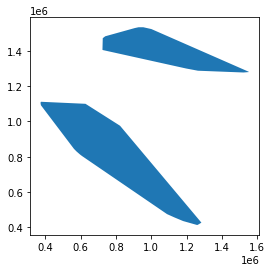

In [28]:
#EJERCICIO 3
systems.convex_hull.plot() 
#Convertimos los sistemas de ríos a hulls

In [29]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Missisipi', 'Rio Grande']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:3081"
systems_hulls

,geometry,system
0,"POLYGON ((1521880.766 1276842.584, 1266966.126...",Missisipi
1,"POLYGON ((1257700.213 413672.731, 1180345.006 ...",Rio Grande


In [30]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Austin Bergstrom International Airport,Dallas Fort Worth International Airport,George Bush Intercontinental Houston Airport,San Antonio International Airport
system,,,,
Missisipi,393.769674,91.168948,400.751120,479.939778
Rio Grande,256.181456,488.896250,417.031552,149.416942


In [31]:
systems_hulls_2=systems_hulls[systems_hulls.system=="Missisipi"]
distanceMatrixKM_sysHull_air_2=systems_hulls_2.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air_2

name,Austin Bergstrom International Airport,Dallas Fort Worth International Airport,George Bush Intercontinental Houston Airport,San Antonio International Airport
system,,,,
Missisipi,393.769674,91.168948,400.75112,479.939778


In [32]:
#Escogemos el hull de Missisipi
mins=distanceMatrixKM_sysHull_air_2.idxmin(axis="columns")
mins

system
Missisipi Dallas Fort Worth International Airport
dtype: object

In [33]:
base=systems_hulls_2.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_00d053e03806e31f8f8f84beccc16894 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_00d053e03806e31f8f8f84beccc16894" ></div>
 
</body>
<script>
 
 
 var map_00d053e03806e31f8f8f84beccc16894 = L.map(
 "map_00d053e03806e31f8f8f84beccc16894",
 {
 center: [34.76224892484248, -98.53023571487259],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_00d053e03806e31f8f8f84beccc16894);

 

 
 
 var tile_layer_867176110571b8167f83e23f69822b90 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_00d053e03806e31f8f8f84beccc16894);
 
 
 map_00d053e03806e31f8f8f84beccc16894.fitBounds(
 [[33.54780249219972, -103.02435493972415], [35.976695357485234, -94.03611649002104]],
 {}
 );
 
 
 function geo_json_4dc4a3d4d2256397fffc9d8e81a6a2be_styler(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_4dc4a3d4d2256397fffc9d8e81a6a2be_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_4dc4a3d4d2256397fffc9d8e81a6a2be_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap

In [34]:
#EJERCICIO 4
#Crearemos un buffer alrededor de Rio Grande
minMts=distanceMatrixKM_riv_air.loc['Rio Grande'].min()*1000
minMts
texas_rivers[texas_rivers.NAME=='Rio Grande'].buffer(distance = minMts)
bufferAroundRioGrande=texas_rivers[texas_rivers.NAME=='Rio Grande'].buffer(distance = minMts)
bufferAsBase=bufferAroundRioGrande.explore(color='red')
texas_rivers[texas_rivers.NAME=='Rio Grande'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.3})

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_2fd5af43f9178e22eea237f4511b92b0 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_2fd5af43f9178e22eea237f4511b92b0" ></div>
 
</body>
<script>
 
 
 var map_2fd5af43f9178e22eea237f4511b92b0 = L.map(
 "map_2fd5af43f9178e22eea237f4511b92b0",
 {
 center: [28.926049095904354, -101.97975254108958],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_2fd5af43f9178e22eea237f4511b92b0);

 

 
 
 var tile_layer_21db0c899b782d45ef043d9da1462cba = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_2fd5af43f9178e22eea237f4511b92b0);
 
 
 map_2fd5af43f9178e22eea237f4511b92b0.fitBounds(
 [[23.911234167176122, -108.93047379550332], [33.94086402463258, -95.02903128667585]],
 {}
 );
 
 
 function geo_json_91e7c745cc65bc3dd5bad106ab7c42fd_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "red", "fillColor": "red", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_91e7c745cc65bc3dd5bad106ab7c42fd_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_91e7c745cc65bc3dd5bad106ab7c42fd_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_91e7c745cc65bc3dd5bad106ab7c42fd_

In [35]:
minMts_2=distanceMatrixKM_riv_air.loc['Canadian'].min()*10
minMts_2
texas_rivers[texas_rivers.NAME=='Canadian'].buffer(distance = minMts_2)
bufferAroundCanadian=texas_rivers[texas_rivers.NAME=='Canadian'].buffer(distance = minMts_2)
bufferAsBase_2=bufferAroundCanadian.explore(color='greenyellow')
texas_rivers[texas_rivers.NAME=='Canadian'].explore(m=bufferAsBase_2,color='blue',style_kwds={'weight':0.5})

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_ffd2c11e3b727c3231d27af76eb84857 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_ffd2c11e3b727c3231d27af76eb84857" ></div>
 
</body>
<script>
 
 
 var map_ffd2c11e3b727c3231d27af76eb84857 = L.map(
 "map_ffd2c11e3b727c3231d27af76eb84857",
 {
 center: [35.68119144673009, -101.51110988754581],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_ffd2c11e3b727c3231d27af76eb84857);

 

 
 
 var tile_layer_7e8f7afd23f6d6c9dad9fedd66e2c8cf = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_ffd2c11e3b727c3231d27af76eb84857);
 
 
 map_ffd2c11e3b727c3231d27af76eb84857.fitBounds(
 [[35.347106200074535, -103.07151249545842], [36.015276693385644, -99.95070727963322]],
 {}
 );
 
 
 function geo_json_d893f013cf3da022d5d1a6bc1f6f1111_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "greenyellow", "fillColor": "greenyellow", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_d893f013cf3da022d5d1a6bc1f6f1111_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_d893f013cf3da022d5d1a6bc1f6f1111_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_d893f013cf3da022d

In [36]:
minMts_3=distanceMatrixKM_riv_air.loc['Pecos'].min()*50
minMts_3
texas_rivers[texas_rivers.NAME=='Pecos'].buffer(distance = minMts_3)
bufferAroundPecos=texas_rivers[texas_rivers.NAME=='Pecos'].buffer(distance = minMts_3)
bufferAsBase_3=bufferAroundPecos.explore(color='#D2A2FF')
texas_rivers[texas_rivers.NAME=='Pecos'].explore(m=bufferAsBase_3,color='blue',style_kwds={'weight':0.5})

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_6677f3d77f377d8a3f636d835fde0544 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_6677f3d77f377d8a3f636d835fde0544" ></div>
 
</body>
<script>
 
 
 var map_6677f3d77f377d8a3f636d835fde0544 = L.map(
 "map_6677f3d77f377d8a3f636d835fde0544",
 {
 center: [30.833799066516658, -102.64651347530466],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_6677f3d77f377d8a3f636d835fde0544);

 

 
 
 var tile_layer_d2327fc1cd69783c91d3ada162ba9028 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_6677f3d77f377d8a3f636d835fde0544);
 
 
 map_6677f3d77f377d8a3f636d835fde0544.fitBounds(
 [[29.536021317010153, -104.10085399699803], [32.13157681602316, -101.19217295361128]],
 {}
 );
 
 
 function geo_json_8b3f5df877f0210f5ab2dd233084dff9_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "#D2A2FF", "fillColor": "#D2A2FF", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_8b3f5df877f0210f5ab2dd233084dff9_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_8b3f5df877f0210f5ab2dd233084dff9_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_8b3f5df877f0210f5ab2dd23

In [37]:
small_airports=texas_airports[texas_airports.kind=='small_airport']

texas_rivers[texas_rivers.NAME=='Rio Grande'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')
#Son los aeropuertos pequeños dentro de Texas, pero nosotros solo queremos los que estan adentro del buffer

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_2fd5af43f9178e22eea237f4511b92b0 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_2fd5af43f9178e22eea237f4511b92b0" ></div>
 
</body>
<script>
 
 
 var map_2fd5af43f9178e22eea237f4511b92b0 = L.map(
 "map_2fd5af43f9178e22eea237f4511b92b0",
 {
 center: [28.926049095904354, -101.97975254108958],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_2fd5af43f9178e22eea237f4511b92b0);

 

 
 
 var tile_layer_21db0c899b782d45ef043d9da1462cba = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_2fd5af43f9178e22eea237f4511b92b0);
 
 
 map_2fd5af43f9178e22eea237f4511b92b0.fitBounds(
 [[23.911234167176122, -108.93047379550332], [33.94086402463258, -95.02903128667585]],
 {}
 );
 
 
 function geo_json_91e7c745cc65bc3dd5bad106ab7c42fd_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "red", "fillColor": "red", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_91e7c745cc65bc3dd5bad106ab7c42fd_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_91e7c745cc65bc3dd5bad106ab7c42

In [38]:
riversWithinBuffer=small_airports.clip(mask=bufferAroundRioGrande)
riversWithinBuffer

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
687,Reynolds Ranch Airport,small_airport,26.158425,-97.388688,24.0,Texas,Bayview,POINT (1261492.409 448498.274)
89,Port Isabel Cameron County Airport,small_airport,26.166201,-97.345901,19.0,Texas,Port Isabel,POINT (1265755.464 449462.868)
685,Rancho Buena Vista Airport,small_airport,26.251200,-97.300797,20.0,Texas,Bay View,POINT (1270040.844 459001.282)
174,Waldron Field Naval Outlying Landing Field,small_airport,27.635000,-97.312202,25.0,Texas,Corpus Christi,POINT (1265172.989 612347.193)
62,Mustang Beach Airport,small_airport,27.811800,-97.088799,5.0,Texas,Port Aransas,POINT (1286693.274 632483.766)
...,...,...,...,...,...,...,...,...
1091,Wilhelm Airport,small_airport,31.067320,-100.003620,2350.0,Texas,Eden,POINT (999655.253 989008.755)
1914,Flying Eagle Ranch Airport,small_airport,31.775133,-105.431317,4300.0,Texas,Salt Flat,POINT (486805.204 1079922.719)
2145,Guadalupe Intermediate Field,small_airport,31.856100,-104.544120,3955.0,Texas,Van Horn,POINT (570950.902 1085094.800)
1915,Mayfield Ranch Airport,small_airport,31.901020,-105.479800,4590.0,Texas,Salt Flat,POINT (482917.579 1094061.535)


In [39]:
bufferAsBase=bufferAroundRioGrande.explore(color='greenyellow')
texas_rivers[texas_rivers.NAME=='Rio Grande'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='red')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_18de4028e860c954a097385daf4e7c45 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_18de4028e860c954a097385daf4e7c45" ></div>
 
</body>
<script>
 
 
 var map_18de4028e860c954a097385daf4e7c45 = L.map(
 "map_18de4028e860c954a097385daf4e7c45",
 {
 center: [28.926049095904354, -101.97975254108958],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_18de4028e860c954a097385daf4e7c45);

 

 
 
 var tile_layer_fc86399dbf3e73bd05f9b616b7ebc9b2 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_18de4028e860c954a097385daf4e7c45);
 
 
 map_18de4028e860c954a097385daf4e7c45.fitBounds(
 [[23.911234167176122, -108.93047379550332], [33.94086402463258, -95.02903128667585]],
 {}
 );
 
 
 function geo_json_60425a40cbeaa5e07322ceceb8081737_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "greenyellow", "fillColor": "greenyellow", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_60425a40cbeaa5e07322ceceb8081737_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_60425a40cbeaa5e07322ceceb8081737_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff

In [42]:
riversWithinBuffer_2=small_airports.clip(mask=bufferAroundPecos)
bufferAsBase_2=bufferAroundPecos.explore(color='#D2A2FF')
texas_rivers[texas_rivers.NAME=='Pecos'].explore(m=bufferAsBase_2,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer_2.explore(m=bufferAsBase_2,color='red')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_5d6b81f8fd85f4c108b06b28fa2caa59 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_5d6b81f8fd85f4c108b06b28fa2caa59" ></div>
 
</body>
<script>
 
 
 var map_5d6b81f8fd85f4c108b06b28fa2caa59 = L.map(
 "map_5d6b81f8fd85f4c108b06b28fa2caa59",
 {
 center: [30.833799066516658, -102.64651347530466],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_5d6b81f8fd85f4c108b06b28fa2caa59);

 

 
 
 var tile_layer_b2ff97bf907c10c9eec97f821ae9a755 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_5d6b81f8fd85f4c108b06b28fa2caa59);
 
 
 map_5d6b81f8fd85f4c108b06b28fa2caa59.fitBounds(
 [[29.536021317010153, -104.10085399699803], [32.13157681602316, -101.19217295361128]],
 {}
 );
 
 
 function geo_json_22981d3cdc60271c35fa08df5516c9c3_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "#D2A2FF", "fillColor": "#D2A2FF", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_22981d3cdc60271c35fa08df5516c9c3_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_22981d3cdc60271c35fa08df5516c9c3_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fil

In [44]:
riversWithinBuffer_3=small_airports.clip(mask=bufferAroundCanadian)
bufferAsBase_3=bufferAroundCanadian.explore(color='#FFA459')
texas_rivers[texas_rivers.NAME=='Canadian'].explore(m=bufferAsBase_3,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer_3.explore(m=bufferAsBase_3,color='red')

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_53a9f90f6e8fa2a4971b79437107f3b3 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_53a9f90f6e8fa2a4971b79437107f3b3" ></div>
 
</body>
<script>
 
 
 var map_53a9f90f6e8fa2a4971b79437107f3b3 = L.map(
 "map_53a9f90f6e8fa2a4971b79437107f3b3",
 {
 center: [35.68119144673009, -101.51110988754581],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_53a9f90f6e8fa2a4971b79437107f3b3);

 

 
 
 var tile_layer_76970ea06c0f2b5bf4605ab9a60351c1 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_53a9f90f6e8fa2a4971b79437107f3b3);
 
 
 map_53a9f90f6e8fa2a4971b79437107f3b3.fitBounds(
 [[35.347106200074535, -103.07151249545842], [36.015276693385644, -99.95070727963322]],
 {}
 );
 
 
 function geo_json_d87d8c4970dbf5228547c787be6aa866_styler(feature) {
 switch(feature.id) {
 default:
 return {"color": "#FFA459", "fillColor": "#FFA459", "fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_d87d8c4970dbf5228547c787be6aa866_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_d87d8c4970dbf5228547c787be6aa866_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fill